In [1]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import (uses Part 5.1's offset-free controller)
from Deliverable_5_1.LinearMPC_template.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 20; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 2.0
rocket.fuel_rate = 0.1
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Simulating time 0.00: Fuel left: 1.00 kg, 
Simulating time 0.05: Fuel left: 1.00 kg, 
Simulating time 0.10: Fuel left: 0.99 kg, 
Simulating time 0.15: Fuel left: 0.99 kg, 
Simulating time 0.20: Fuel left: 0.99 kg, 
Simulating time 0.25: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.19 > 0.17, Fuel left: 0.99 kg, 
Simulating time 0.30: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, Fuel left: 0.98 kg, 
Simulating time 0.35: Fuel left: 0.98 kg, 
Simulating time 0.40: Fuel left: 0.98 kg, 
Simulating time 0.45: Fuel left: 0.98 kg, 
Simulating time 0.50: 
 State

Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mpc2025project/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Context object at 0x1068ba600> is already entered
Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mpc2025project/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Context object at 0x1068ba600> is already entered
Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mpc2025project/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Contex

Fuel left: 0.05 kg, 


Task was destroyed but it is pending!
task: <Task pending name='Task-10' coro=<_async_in_context.<locals>.run_in_context() done, defined at /opt/anaconda3/envs/mpc2025project/lib/python3.12/site-packages/ipykernel/utils.py:57> wait_for=<Task pending name='Task-11' coro=<Kernel.shell_main() running at /opt/anaconda3/envs/mpc2025project/lib/python3.12/site-packages/ipykernel/kernelbase.py:590> cb=[Task.__wakeup()]> cb=[ZMQStream._run_callback.<locals>._log_error() at /opt/anaconda3/envs/mpc2025project/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py:563]>
Task was destroyed but it is pending!
task: <Task pending name='Task-11' coro=<Kernel.shell_main() running at /opt/anaconda3/envs/mpc2025project/lib/python3.12/site-packages/ipykernel/kernelbase.py:590> cb=[Task.__wakeup()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-12' coro=<_async_in_context.<locals>.run_in_context() done, defined at /opt/anaconda3/envs/mpc2025project/lib/python3.12/site-packages/ipyk

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

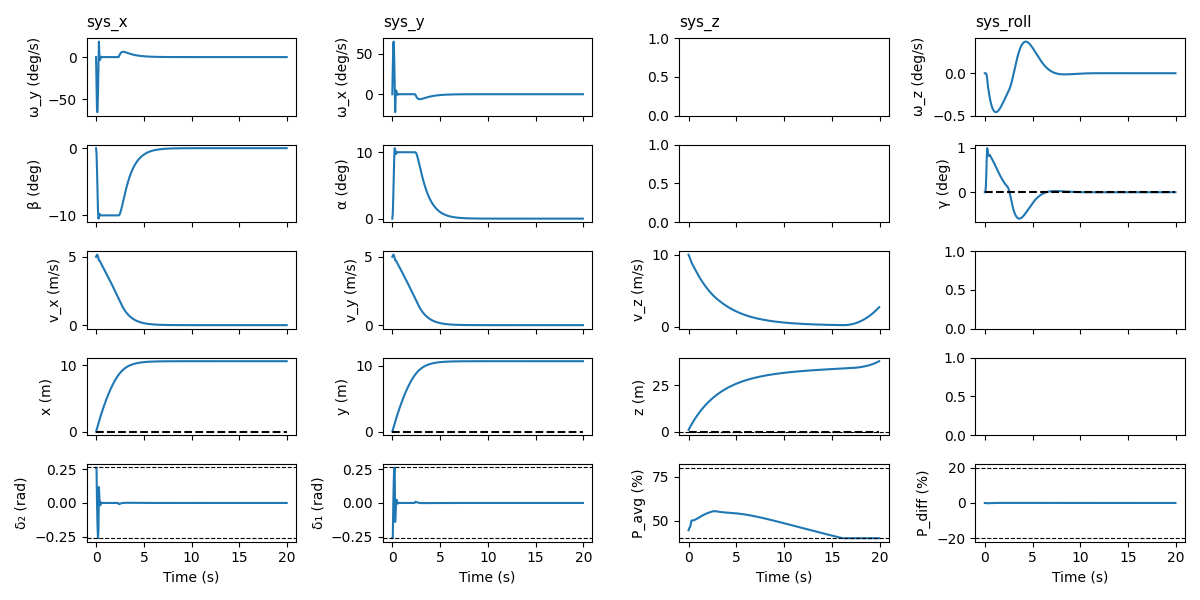

In [4]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])

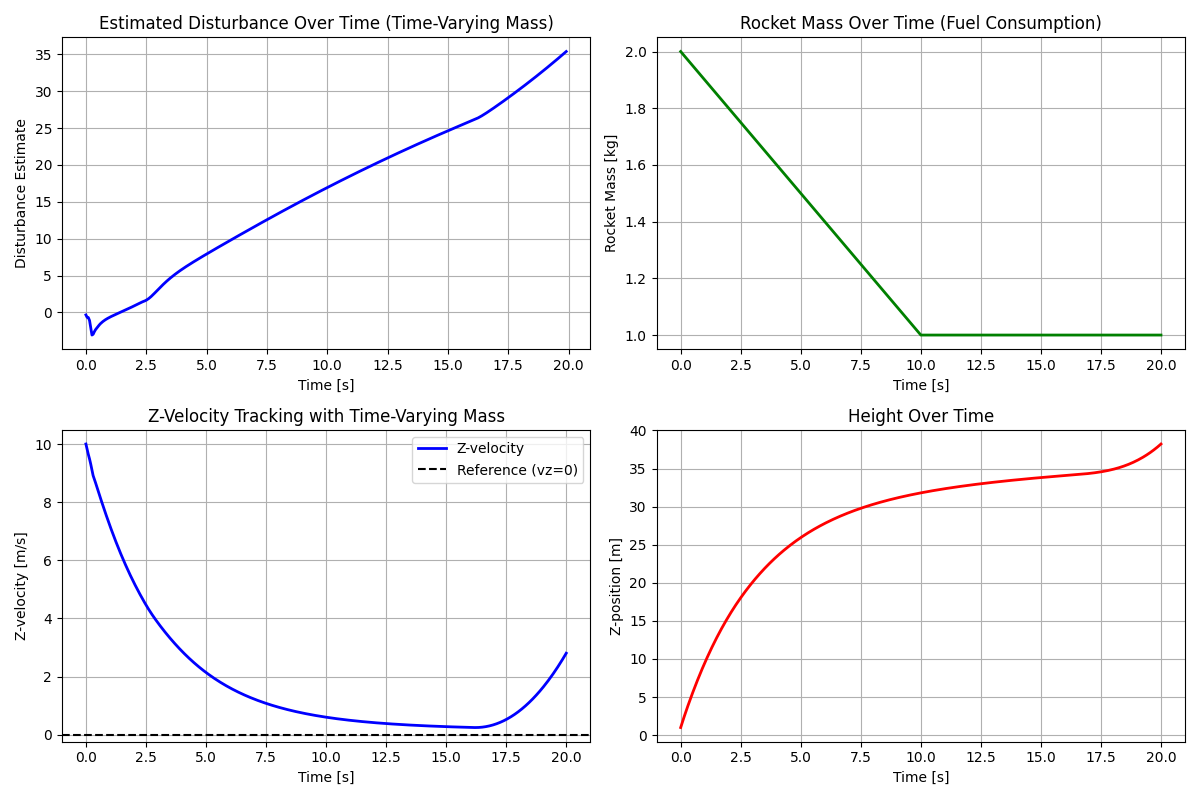


=== Disturbance Estimation Statistics ===
Initial disturbance estimate: -0.3350
Final disturbance estimate: 35.3837
Disturbance range: [-3.0622, 35.3837]


In [5]:
import matplotlib.pyplot as plt

# Disturbance estimation plot
d_history = mpc.mpc_z.d_history

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Disturbance estimate over time
time_steps = np.arange(len(d_history)) * Ts
axes[0, 0].plot(time_steps, d_history, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('Disturbance Estimate')
axes[0, 0].set_title('Estimated Disturbance Over Time (Time-Varying Mass)')
axes[0, 0].grid(True)

# Mass evolution over time (fuel consumption)
initial_fuel = 1.0  # kg
mass_base = 2.0 - initial_fuel  # dry mass
fuel_rate = 0.1  # kg/s
time_mass = np.linspace(0, sim_time, len(t_cl))
fuel_remaining = np.maximum(initial_fuel - fuel_rate * time_mass, 0)
mass_over_time = mass_base + fuel_remaining
axes[0, 1].plot(time_mass, mass_over_time, 'g-', linewidth=2)
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Rocket Mass [kg]')
axes[0, 1].set_title('Rocket Mass Over Time (Fuel Consumption)')
axes[0, 1].grid(True)

# Z-velocity tracking
axes[1, 0].plot(t_cl, x_cl[8, :], 'b-', linewidth=2, label='Z-velocity')
axes[1, 0].axhline(y=0, color='k', linestyle='--', label='Reference (vz=0)')
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Z-velocity [m/s]')
axes[1, 0].set_title('Z-Velocity Tracking with Time-Varying Mass')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Z-position (height) over time
axes[1, 1].plot(t_cl, x_cl[11, :], 'r-', linewidth=2)
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Z-position [m]')
axes[1, 1].set_title('Height Over Time')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n=== Disturbance Estimation Statistics ===")
print(f"Initial disturbance estimate: {d_history[0]:.4f}")
print(f"Final disturbance estimate: {d_history[-1]:.4f}")
print(f"Disturbance range: [{min(d_history):.4f}, {max(d_history):.4f}]")


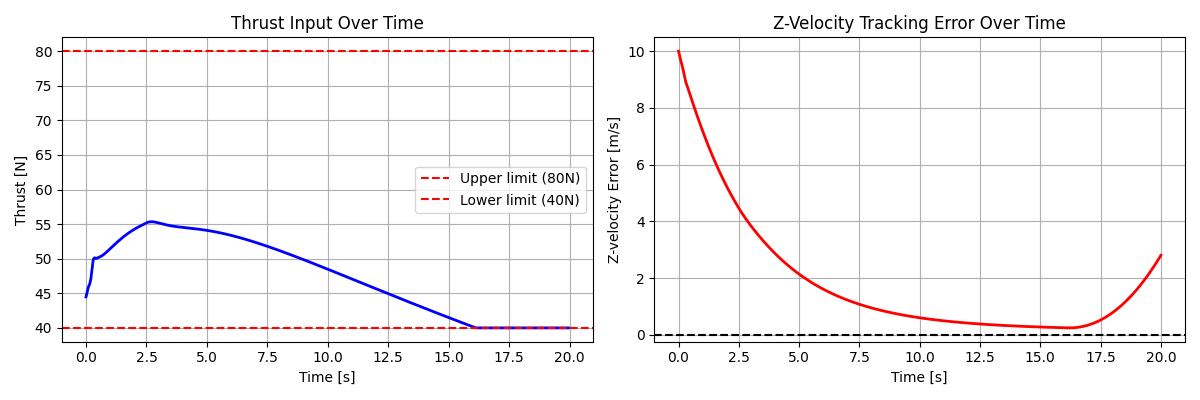

In [6]:
# Thrust input and tracking error analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Thrust input over time
axes[0].plot(t_cl[:-1], u_cl[2, :], 'b-', linewidth=2)
axes[0].axhline(y=80, color='r', linestyle='--', label='Upper limit (80N)')
axes[0].axhline(y=40, color='r', linestyle='--', label='Lower limit (40N)')
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Thrust [N]')
axes[0].set_title('Thrust Input Over Time')
axes[0].legend()
axes[0].grid(True)

# Z-velocity tracking error
tracking_error = x_cl[8, :] - 0  # Reference is 0
axes[1].plot(t_cl, tracking_error, 'r-', linewidth=2)
axes[1].axhline(y=0, color='k', linestyle='--')
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Z-velocity Error [m/s]')
axes[1].set_title('Z-Velocity Tracking Error Over Time')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Why is there still a tracking offset in height in the first seconds despite the estimator?**

The observer is initialized with zero disturbance estimate, but the actual disturbance (due to mass mismatch) is nonzero from the start. The observer needs several time steps to converge to the true value: during this transient, the controller doesn't fully compensate the disturbance, causing velocity tracking error. This velocity error integrates over time, resulting in a height offset.

**How to modify the estimator for offset-free tracking with changing mass?**

The current observer assumes constant disturbance ($d^+ = d$). For time-varying mass:
- Augment the state with the disturbance rate: estimate both $d$ and $\dot{d}$
- Or use a Kalman filter with process noise on the disturbance, allowing faster adaptation to changes

---

**Trajectory behaviors:**
- **0-2s:** Observer converging, large error
- **2-10s:** Fuel burning, estimator chasing the changing mass  
- **10-17s:** Fuel gone, tracking improves
- **>17s:** Unexpected upward acceleration

**Unexpected behavior:** After fuel depletes, the estimator overshoots and keeps growing. This over-compensates thrust downward until it hits the 40N minimum. But 40N is too much for a 1kg rocket (needs ~10N to hover), causing upward acceleration.
